In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/multiome_10xpbmc_10k',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7']

In [3]:
sys.path.insert(1,'/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/')
sys.path[:3]

['/data/pinello/PROJECTS/2019_08_Embedding/SIMBA_RESULTS/multiome_10xpbmc_10k',
 '/data/pinello/PROJECTS/2019_08_Embedding/Github/simba/',
 '/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python37.zip']

In [4]:
import simba as si
import os
si.__version__

'0.1a'

In [5]:
workdir = 'result_10xpbmc10k_integration_v3'
si.settings.set_workdir(workdir)

Saving results in: result_10xpbmc10k_integration_v3


In [6]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

## ATAC-seq

### preprocessing

In [7]:
adata_CP = si.read_h5ad("./input/data_processed/atac/atac_seq.h5ad")

In [8]:
adata_CP

AnnData object with n_obs × n_vars = 11909 × 108377
    obs: 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'chr', 'start', 'end'

In [9]:
adata_CP.obs['celltype'] = adata_CP.obs['celltype'].astype(int).astype("category")

In [10]:
# si.pp.filter_cells_atac(adata,min_n_genes=100)
si.pp.filter_peaks(adata_CP,min_n_cells=3)

Before filtering: 
11909 cells, 108377 peaks
Filter peaks based on min_n_cells


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


After filtering out low-expressed peaks: 
11909 cells, 107385 peaks


In [11]:
si.pp.cal_qc_atac(adata_CP)

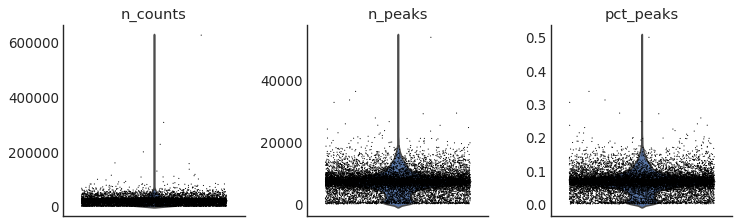

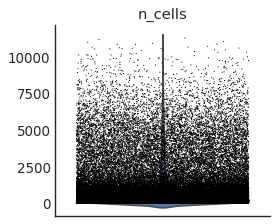

In [12]:
si.pl.violin(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], list_var=['n_cells'])

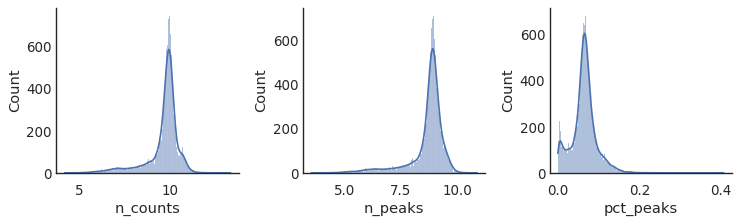

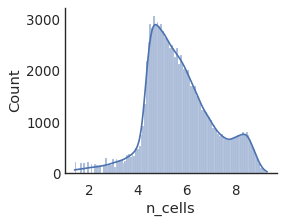

In [13]:
si.pl.hist(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], log=True, list_var=['n_cells'])

### select peaks (optional but suggested)

> it will speed up the trainning process while only keeping peaks associated with top PCs

In [14]:
si.pp.pca(adata_CP, n_components=50)

the number of selected PC is: 50


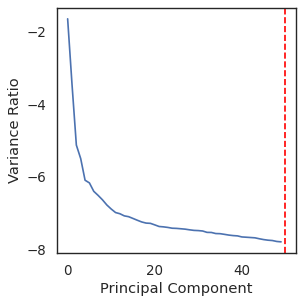

In [15]:
si.pl.pca_variance_ratio(adata_CP)

In [16]:
#The number of selected PCs can be further reduced
si.pp.select_pcs(adata_CP,n_pcs=40)

In [17]:
si.pp.select_pcs_features(adata_CP)

#features selected from PC 0: 18006
#features selected from PC 1: 17932
#features selected from PC 2: 17967
#features selected from PC 3: 17927
#features selected from PC 4: 18009
#features selected from PC 5: 17933
#features selected from PC 6: 17903
#features selected from PC 7: 17954
#features selected from PC 8: 17915
#features selected from PC 9: 17935
#features selected from PC 10: 17938
#features selected from PC 11: 17964
#features selected from PC 12: 17936
#features selected from PC 13: 17903
#features selected from PC 14: 17909
#features selected from PC 15: 17947
#features selected from PC 16: 17900
#features selected from PC 17: 17932
#features selected from PC 18: 18012
#features selected from PC 19: 17904
#features selected from PC 20: 17897
#features selected from PC 21: 17967
#features selected from PC 22: 17925
#features selected from PC 23: 17905
#features selected from PC 24: 17927
#features selected from PC 25: 17916
#features selected from PC 26: 17948
#features s

In [18]:
# si.pl.pcs_features(adata_CP, fig_size=(3,3))

## RNA-seq

In [19]:
adata_CG = si.read_h5ad("./input/data_processed/rna/rna_seq.h5ad")

In [20]:
adata_CG

AnnData object with n_obs × n_vars = 11909 × 36601
    obs: 'celltype'
    var: 'gene_ids', 'feature_types', 'genome'

In [21]:
adata_CG.obs['celltype'] = adata_CG.obs['celltype'].astype(int).astype("category")

In [22]:
si.pp.filter_genes(adata_CG,min_n_cells=3)

Before filtering: 
11909 cells, 36601 genes
Filter genes based on min_n_cells


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


After filtering out low-expressed genes: 
11909 cells, 26349 genes


In [23]:
si.pp.cal_qc_rna(adata_CG)

In [24]:
si.pp.normalize(adata_CG,method='lib_size')

In [25]:
si.pp.log_transform(adata_CG)

In [26]:
si.pp.select_variable_genes(adata_CG, n_top_genes=4000)

4000 variable genes are selected.


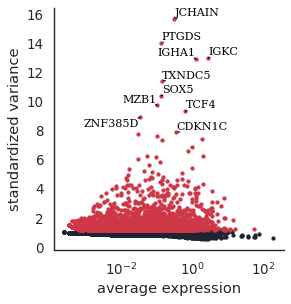

In [27]:
si.pl.variable_genes(adata_CG,show_texts=True)

In [28]:
si.tl.discretize(adata_CG,n_bins=5)

[0.10545505 1.1394415  1.6413939  2.2801735  3.3480122  8.160636  ]


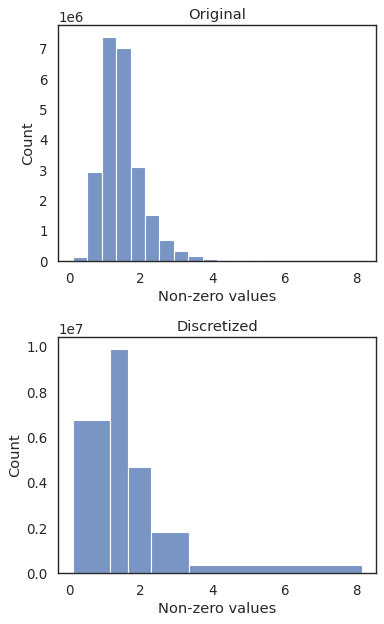

In [29]:
si.pl.discretize(adata_CG,kde=False)

## Infer edges between cells

In [30]:
adata_CG_atac = si.tl.gene_scores(adata_CP,genome='hg38',use_gene_weigt=True, use_top_pcs=True)

Gene scores are being calculated for the first time
`use_precomputed` has been ignored


***** WARNING: File /tmp/pybedtools.dwahwm57.tmp has inconsistent naming convention for record:
GL000194.1	101218	101619	61173

***** WARNING: File /tmp/pybedtools.dwahwm57.tmp has inconsistent naming convention for record:
GL000194.1	101218	101619	61173

***** WARNING: File /tmp/pybedtools.dwahwm57.tmp has inconsistent naming convention for record:
GL000194.1	101218	101619	61173

***** WARNING: File /tmp/pybedtools.dwahwm57.tmp has inconsistent naming convention for record:
GL000194.1	101218	101619	61173



Processing: 0.0%
Processing: 20.0%
Processing: 40.0%
Processing: 60.0%


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [31]:
si.pp.filter_genes(adata_CG_atac,min_n_cells=3)
si.pp.cal_qc_rna(adata_CG_atac)
si.pp.normalize(adata_CG_atac,method='lib_size')
si.pp.log_transform(adata_CG_atac)

Before filtering: 
11909 cells, 38824 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
11909 cells, 22786 genes


In [32]:
adata_CG_atac.obs['celltype'] = adata_CG_atac.obs['celltype'].astype(int).astype("category")

In [33]:
adata_CrnaCatac = si.tl.infer_edges(adata_CG, adata_CG_atac, n_components=15, k=15)

#shared features: 2713
Performing randomized SVD ...
Searching for mutual nearest neighbors ...
89680 edges are selected


#selected edges: 89680


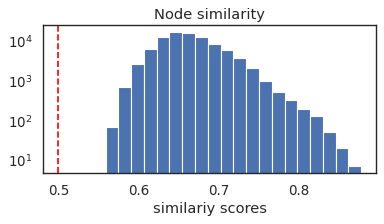

In [34]:
si.pl.node_similarity(adata_CrnaCatac,cutoff=0.5)

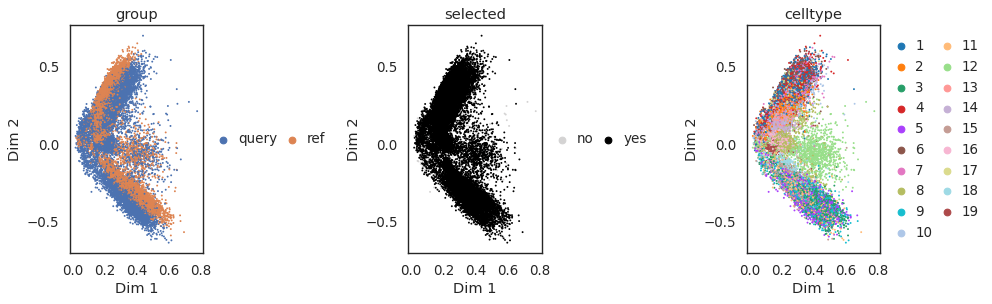

In [35]:
si.pl.svd_nodes(adata_CrnaCatac,color=['celltype'],size=3,cutoff=0.5,fig_legend_ncol=2)

In [36]:
si.tl.trim_edges(adata_CrnaCatac, cutoff=0.5)

89680 edges are selected


In [37]:
adata_CrnaCatac

AnnData object with n_obs × n_vars = 11909 × 11909
    obs: 'celltype', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'celltype', 'n_counts', 'n_peaks', 'pct_peaks', 'n_genes', 'pct_genes', 'pct_mt'
    uns: 'color'
    obsm: 'svd'
    varm: 'svd'
    layers: 'conn'

> Validating matching rate  
>```python
id_x = adata_CrnaCatac.layers['conn'].nonzero()[0]
id_y = adata_CrnaCatac.layers['conn'].nonzero()[1]
print(len(id_x))
n_matched = sum(adata_CrnaCatac.obs.loc[adata_CrnaCatac.obs_names[id_x].str.lstrip('rna_'),'celltype'].values == \
                adata_CrnaCatac.var.loc[adata_CrnaCatac.var_names[id_y].str.lstrip('atac_'),'celltype'].values)
print(n_matched/len(id_x))
```

In [38]:
id_x = adata_CrnaCatac.layers['conn'].nonzero()[0]
id_y = adata_CrnaCatac.layers['conn'].nonzero()[1]
print(len(id_x))
n_matched = sum(adata_CrnaCatac.obs.loc[adata_CrnaCatac.obs_names[id_x],'celltype'].values == \
                adata_CrnaCatac.var.loc[adata_CrnaCatac.var_names[id_y],'celltype'].values)
print(n_matched/len(id_x))

89680
0.5527876895628903


## Generate Graph

In [39]:
si.tl.gen_graph(list_CP=[adata_CP],
                list_CG=[adata_CG],
                list_CC=[adata_CrnaCatac],
                copy=False,
                dirname='graph0')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


relation0: source: C, destination: P
#edges: 79782752
relation1: source: C2, destination: G
#edges: 967473
relation2: source: C2, destination: G
#edges: 1488857
relation3: source: C2, destination: G
#edges: 968440
relation4: source: C2, destination: G
#edges: 544749
relation5: source: C2, destination: G
#edges: 104139
relation6: source: C2, destination: C
#edges: 89680
Total number of edges: 83946090
Writing graph file "pbg_graph.txt" to "result_10xpbmc10k_integration_v3/pbg/graph0" ...
Finished.


## PBG training

In [40]:
si.settings.pbg_params

{'entity_path': 'result_10xpbmc10k_integration_v3/pbg/graph0/input/entity',
 'edge_paths': ['result_10xpbmc10k_integration_v3/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1},
  'C2': {'num_partitions': 1},
  'G': {'num_partitions': 1},
  'P': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'P',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 1.0},
  {'name': 'r2', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r3', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r4', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r5', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 5.0},
  {'name': 'r6', 'lhs': 'C2', 'rhs': 'C', 'operator': 'none', 'weight': 10.0}],
 'dynamic_relations': False,
 'dimension': 50,
 'global_emb': False,
 'comparator': 'dot',
 'num_epochs': 10,
 'workers

In [41]:
dict_config = si.settings.pbg_params.copy()
# ## start training
# dict_config['wd'] = 0.00028 #calculated based on the sample size
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, output='model')

Auto-estimated weight decay is 0.000282
Converting input data ...
[2021-04-26 22:04:15.466489] Using the 7 relation types given in the config
[2021-04-26 22:04:15.466957] Searching for the entities in the edge files...
[2021-04-26 22:06:04.725021] Entity type C:
[2021-04-26 22:06:04.726497] - Found 11909 entities
[2021-04-26 22:06:04.726836] - Removing the ones with fewer than 1 occurrences...
[2021-04-26 22:06:04.728883] - Left with 11909 entities
[2021-04-26 22:06:04.729181] - Shuffling them...
[2021-04-26 22:06:04.736531] Entity type C2:
[2021-04-26 22:06:04.736809] - Found 11909 entities
[2021-04-26 22:06:04.737048] - Removing the ones with fewer than 1 occurrences...
[2021-04-26 22:06:04.738715] - Left with 11909 entities
[2021-04-26 22:06:04.738975] - Shuffling them...
[2021-04-26 22:06:04.746302] Entity type G:
[2021-04-26 22:06:04.746567] - Found 4000 entities
[2021-04-26 22:06:04.746809] - Removing the ones with fewer than 1 occurrences...
[2021-04-26 22:06:04.747456] - Left w

[2021-04-26 22:06:52.704227] - Processed 9700000 edges so far...
[2021-04-26 22:06:53.193422] - Processed 9800000 edges so far...
[2021-04-26 22:06:53.681309] - Processed 9900000 edges so far...
[2021-04-26 22:06:54.169717] - Processed 10000000 edges so far...
[2021-04-26 22:06:54.656389] - Processed 10100000 edges so far...
[2021-04-26 22:06:55.144876] - Processed 10200000 edges so far...
[2021-04-26 22:06:55.632745] - Processed 10300000 edges so far...
[2021-04-26 22:06:56.120704] - Processed 10400000 edges so far...
[2021-04-26 22:06:56.614120] - Processed 10500000 edges so far...
[2021-04-26 22:06:57.103256] - Processed 10600000 edges so far...
[2021-04-26 22:06:57.591770] - Processed 10700000 edges so far...
[2021-04-26 22:06:58.079568] - Processed 10800000 edges so far...
[2021-04-26 22:06:58.567792] - Processed 10900000 edges so far...
[2021-04-26 22:06:59.056548] - Processed 11000000 edges so far...
[2021-04-26 22:06:59.558109] - Processed 11100000 edges so far...
[2021-04-26 2

[2021-04-26 22:07:53.835532] - Processed 22200000 edges so far...
[2021-04-26 22:07:54.322148] - Processed 22300000 edges so far...
[2021-04-26 22:07:54.820120] - Processed 22400000 edges so far...
[2021-04-26 22:07:55.305882] - Processed 22500000 edges so far...
[2021-04-26 22:07:55.791812] - Processed 22600000 edges so far...
[2021-04-26 22:07:56.277322] - Processed 22700000 edges so far...
[2021-04-26 22:07:56.762576] - Processed 22800000 edges so far...
[2021-04-26 22:07:57.249216] - Processed 22900000 edges so far...
[2021-04-26 22:07:57.741029] - Processed 23000000 edges so far...
[2021-04-26 22:07:58.228640] - Processed 23100000 edges so far...
[2021-04-26 22:07:58.716108] - Processed 23200000 edges so far...
[2021-04-26 22:07:59.205474] - Processed 23300000 edges so far...
[2021-04-26 22:07:59.693791] - Processed 23400000 edges so far...
[2021-04-26 22:08:00.186077] - Processed 23500000 edges so far...
[2021-04-26 22:08:00.673390] - Processed 23600000 edges so far...
[2021-04-2

[2021-04-26 22:08:56.392695] - Processed 34700000 edges so far...
[2021-04-26 22:08:56.883483] - Processed 34800000 edges so far...
[2021-04-26 22:08:57.373071] - Processed 34900000 edges so far...
[2021-04-26 22:08:57.866776] - Processed 35000000 edges so far...
[2021-04-26 22:08:58.355508] - Processed 35100000 edges so far...
[2021-04-26 22:08:58.847428] - Processed 35200000 edges so far...
[2021-04-26 22:08:59.335003] - Processed 35300000 edges so far...
[2021-04-26 22:08:59.827557] - Processed 35400000 edges so far...
[2021-04-26 22:09:00.317262] - Processed 35500000 edges so far...
[2021-04-26 22:09:00.806843] - Processed 35600000 edges so far...
[2021-04-26 22:09:01.299345] - Processed 35700000 edges so far...
[2021-04-26 22:09:01.794120] - Processed 35800000 edges so far...
[2021-04-26 22:09:02.281903] - Processed 35900000 edges so far...
[2021-04-26 22:09:02.772222] - Processed 36000000 edges so far...
[2021-04-26 22:09:03.264920] - Processed 36100000 edges so far...
[2021-04-2

[2021-04-26 22:09:57.927584] - Processed 47200000 edges so far...
[2021-04-26 22:09:58.414485] - Processed 47300000 edges so far...
[2021-04-26 22:09:58.902278] - Processed 47400000 edges so far...
[2021-04-26 22:09:59.392144] - Processed 47500000 edges so far...
[2021-04-26 22:09:59.881974] - Processed 47600000 edges so far...
[2021-04-26 22:10:00.371349] - Processed 47700000 edges so far...
[2021-04-26 22:10:00.878561] - Processed 47800000 edges so far...
[2021-04-26 22:10:01.366458] - Processed 47900000 edges so far...
[2021-04-26 22:10:01.854441] - Processed 48000000 edges so far...
[2021-04-26 22:10:02.342084] - Processed 48100000 edges so far...
[2021-04-26 22:10:02.855573] - Processed 48200000 edges so far...
[2021-04-26 22:10:03.342237] - Processed 48300000 edges so far...
[2021-04-26 22:10:03.830984] - Processed 48400000 edges so far...
[2021-04-26 22:10:04.318829] - Processed 48500000 edges so far...
[2021-04-26 22:10:04.834045] - Processed 48600000 edges so far...
[2021-04-2

[2021-04-26 22:10:59.440135] - Processed 59700000 edges so far...
[2021-04-26 22:10:59.954889] - Processed 59800000 edges so far...
[2021-04-26 22:11:00.447249] - Processed 59900000 edges so far...
[2021-04-26 22:11:00.937110] - Processed 60000000 edges so far...
[2021-04-26 22:11:01.425824] - Processed 60100000 edges so far...
[2021-04-26 22:11:01.914208] - Processed 60200000 edges so far...
[2021-04-26 22:11:02.425168] - Processed 60300000 edges so far...
[2021-04-26 22:11:02.914891] - Processed 60400000 edges so far...
[2021-04-26 22:11:03.404039] - Processed 60500000 edges so far...
[2021-04-26 22:11:03.917476] - Processed 60600000 edges so far...
[2021-04-26 22:11:04.408702] - Processed 60700000 edges so far...
[2021-04-26 22:11:04.897256] - Processed 60800000 edges so far...
[2021-04-26 22:11:05.385213] - Processed 60900000 edges so far...
[2021-04-26 22:11:05.884653] - Processed 61000000 edges so far...
[2021-04-26 22:11:06.374193] - Processed 61100000 edges so far...
[2021-04-2

[2021-04-26 22:12:01.920908] - Processed 72200000 edges so far...
[2021-04-26 22:12:02.406517] - Processed 72300000 edges so far...
[2021-04-26 22:12:02.904857] - Processed 72400000 edges so far...
[2021-04-26 22:12:03.388866] - Processed 72500000 edges so far...
[2021-04-26 22:12:03.885275] - Processed 72600000 edges so far...
[2021-04-26 22:12:04.370366] - Processed 72700000 edges so far...
[2021-04-26 22:12:04.878876] - Processed 72800000 edges so far...
[2021-04-26 22:12:05.364553] - Processed 72900000 edges so far...
[2021-04-26 22:12:05.851490] - Processed 73000000 edges so far...
[2021-04-26 22:12:06.358636] - Processed 73100000 edges so far...
[2021-04-26 22:12:06.845908] - Processed 73200000 edges so far...
[2021-04-26 22:12:07.352701] - Processed 73300000 edges so far...
[2021-04-26 22:12:07.840099] - Processed 73400000 edges so far...
[2021-04-26 22:12:08.325244] - Processed 73500000 edges so far...
[2021-04-26 22:12:08.840227] - Processed 73600000 edges so far...
[2021-04-2

In [42]:
si.settings.pbg_params = dict_config.copy()

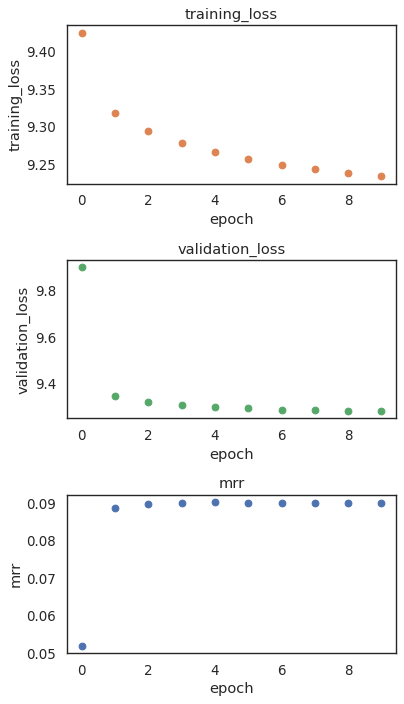

In [43]:
si.pl.pbg_metrics(fig_ncol=1)

In [44]:
si.pl.pbg_metrics(fig_ncol=1,save_fig=True,fig_name='graph0_model.pdf')

## Post-training Analysis

In [45]:
dict_adata = si.read_embedding()

In [46]:
dict_adata

{'P': AnnData object with n_obs × n_vars = 61189 × 50,
 'C': AnnData object with n_obs × n_vars = 11909 × 50,
 'C2': AnnData object with n_obs × n_vars = 11909 × 50,
 'G': AnnData object with n_obs × n_vars = 4000 × 50}

In [47]:
adata_C = dict_adata['C']  # embeddings for cells1
adata_C2 = dict_adata['C2']  # embeddings for cells2
adata_G = dict_adata['G']  # embeddings for genes
adata_P = dict_adata['P']  # embeddings for peaks

In [48]:
adata_C

AnnData object with n_obs × n_vars = 11909 × 50

In [49]:
adata_C2

AnnData object with n_obs × n_vars = 11909 × 50

In [50]:
adata_G

AnnData object with n_obs × n_vars = 4000 × 50

### visualize embeddings of cells (ATAC-seq)

In [51]:
## Add annotation of celltypes (optional)
# adata_CP.obs['celltype'] = adata_CP.obs['celltype'].astype(int).astype("category")
adata_C.obs['celltype'] = adata_CP[adata_C.obs_names,:].obs['celltype'].copy()

In [52]:
adata_C

AnnData object with n_obs × n_vars = 11909 × 50
    obs: 'celltype'

In [53]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

In [54]:
adata_C

AnnData object with n_obs × n_vars = 11909 × 50
    obs: 'celltype'
    obsm: 'X_umap'

In [55]:
import seaborn as sns
pal = sns.color_palette('deep', 10).as_hex() + sns.color_palette('pastel', 10).as_hex()
palette_celltype={x:pal[i] for i,x in enumerate(adata_CP.obs['celltype'].cat.categories)}

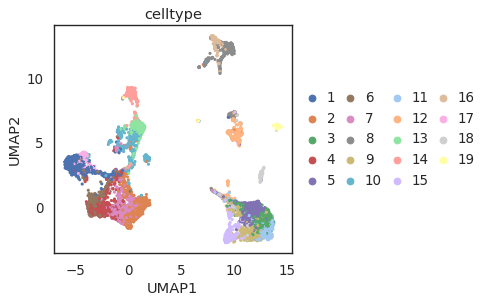

In [56]:
si.pl.umap(adata_C,color=['celltype'],fig_size=(6,4), fig_legend_ncol=4, 
           dict_palette={'celltype': palette_celltype},
           drawing_order='random')

### visualize embeddings of cells (RNA-seq)

In [57]:
## Add annotation of celltypes (optional)
# adata_CG.obs['celltype'] = adata_CG.obs['celltype'].astype(int).astype("category")
adata_C2.obs['celltype'] = adata_CG[adata_C2.obs_names,:].obs['celltype'].copy()

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [58]:
adata_C2

AnnData object with n_obs × n_vars = 11909 × 50
    obs: 'celltype'

In [59]:
si.tl.umap(adata_C2,n_neighbors=15,n_components=2)

In [60]:
adata_C2

AnnData object with n_obs × n_vars = 11909 × 50
    obs: 'celltype'
    obsm: 'X_umap'

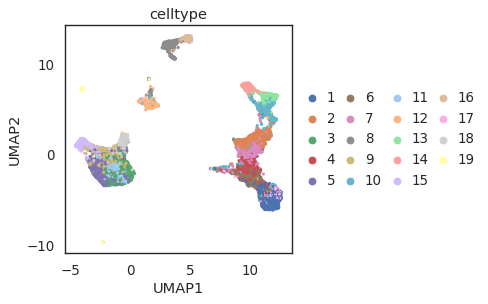

In [61]:
si.pl.umap(adata_C2,color=['celltype'],fig_size=(6,4), fig_legend_ncol=4, 
           dict_palette={'celltype': palette_celltype},
           drawing_order='random')

In [62]:
# adata_C.write('/data/pinello/PROJECTS/2019_08_Embedding/test/test_softmax/10X10k/adata_C.h5ad')
# adata_C2.write('/data/pinello/PROJECTS/2019_08_Embedding/test/test_softmax/10X10k/adata_C2.h5ad')

### visualize co-embeddings of ATAC-seq cells and RNA-seq cells

In [63]:
adata_all_ori = adata_C.concatenate(adata_C2, index_unique=None, batch_categories=['ATAC-seq','RNA-seq'])

In [64]:
adata_all_ori.obs.head()

,celltype,batch
GAGTAACCAGTTTGGC-1_atac,2,ATAC-seq
TTGTCCATCCCTGATC-1_atac,12,ATAC-seq
TTTCGTCCATGTGGGA-1_atac,14,ATAC-seq
GCCTTTATCGTGCTTC-1_atac,13,ATAC-seq
AGCACTAGTCACCTAT-1_atac,1,ATAC-seq


In [65]:
## add annotations of cells and genes
adata_all_ori.obs['entity_group'] = ""
adata_all_ori.obs.loc[adata_C.obs_names, 'entity_group'] = "ATAC-seq"
adata_all_ori.obs.loc[adata_C2.obs_names, 'entity_group'] = "RNA-seq"
adata_all_ori.obs.head()

,celltype,batch,entity_group
GAGTAACCAGTTTGGC-1_atac,2,ATAC-seq,ATAC-seq
TTGTCCATCCCTGATC-1_atac,12,ATAC-seq,ATAC-seq
TTTCGTCCATGTGGGA-1_atac,14,ATAC-seq,ATAC-seq
GCCTTTATCGTGCTTC-1_atac,13,ATAC-seq,ATAC-seq
AGCACTAGTCACCTAT-1_atac,1,ATAC-seq,ATAC-seq


In [66]:
si.tl.umap(adata_all_ori,n_neighbors=15,n_components=2)

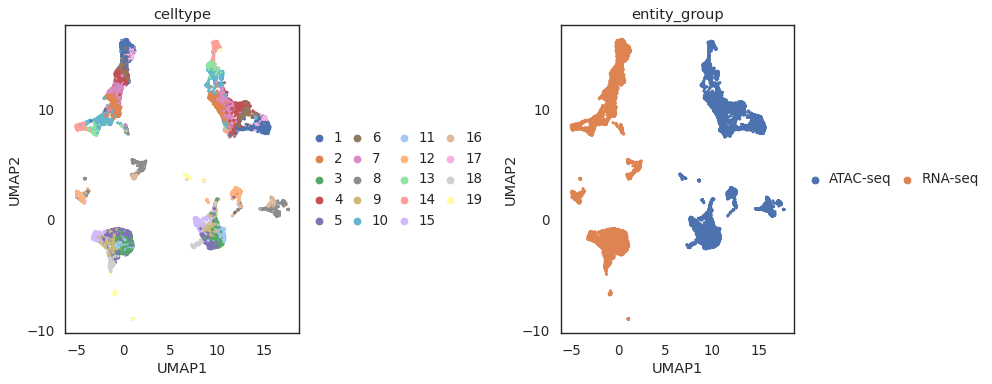

In [67]:
si.pl.umap(adata_all_ori,color=['celltype','entity_group'],fig_legend_ncol=4,
           dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           fig_size=(6,5))

In [68]:
si.pl.umap(adata_all_ori,color=['celltype','entity_group'],fig_legend_ncol=4,
           dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           fig_size=(6,5),
           save_fig=True,
           fig_name='umap_graph0_model_before_softmax.pdf')

In [69]:
adata_all = si.tl.embed(adata_ref=adata_C2,
                        list_adata_query=[adata_C],
                        use_precomputed=False)

Performing softmax transformation for query data 0;


In [70]:
## add annotations of cells and genes
adata_all.obs['entity_group'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_group'] = "ATAC-seq"
adata_all.obs.loc[adata_C2.obs_names, 'entity_group'] = "RNA-seq"
adata_all.obs.head()

,celltype,id_dataset,entity_group
CCCAAATAGCCTGTTC-1_rna,5,ref,RNA-seq
TCAAGGAAGCAGCTCA-1_rna,9,ref,RNA-seq
AAAGGCTCACAGCCAT-1_rna,2,ref,RNA-seq
TATAGCTCACCTGCCT-1_rna,3,ref,RNA-seq
CGATTTGCACCTACTT-1_rna,12,ref,RNA-seq


In [72]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

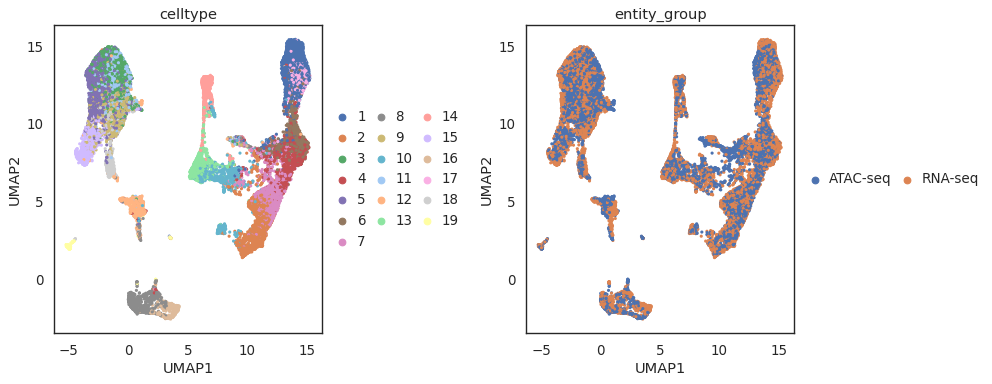

In [73]:
si.pl.umap(adata_all,color=['celltype','entity_group'],fig_legend_ncol=3,
           dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           fig_size=(6,5))

In [74]:
si.pl.umap(adata_all,color=['celltype','entity_group'],fig_legend_ncol=3,
           dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           fig_size=(6,5),
           save_fig=True,
           fig_name='umap_graph0_model.pdf')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


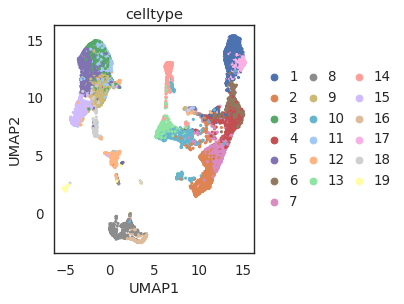

In [75]:
si.pl.umap(adata_all[adata_C.obs_names,],color=['celltype'],fig_legend_ncol=3,
           drawing_order='random',
           dict_palette={'celltype': palette_celltype},
           fig_size=(5,4))

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


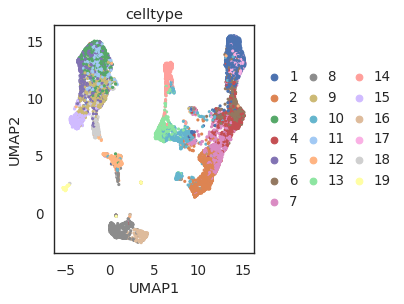

In [76]:
si.pl.umap(adata_all[adata_C2.obs_names,],color=['celltype'],fig_legend_ncol=3,
           drawing_order='random',
           dict_palette={'celltype': palette_celltype},
           fig_size=(5,4))

### use atac_seq as reference

In [77]:
adata_all2 = si.tl.embed(adata_ref=adata_C,
                        list_adata_query=[adata_C2])

Performing softmax transformation for query data 0;


In [78]:
## add annotations of cells and genes
adata_all2.obs['entity_group'] = ""
adata_all2.obs.loc[adata_C.obs_names, 'entity_group'] = "ATAC-seq"
adata_all2.obs.loc[adata_C2.obs_names, 'entity_group'] = "RNA-seq"
adata_all2.obs.head()

,celltype,id_dataset,entity_group
GAGTAACCAGTTTGGC-1_atac,2,ref,ATAC-seq
TTGTCCATCCCTGATC-1_atac,12,ref,ATAC-seq
TTTCGTCCATGTGGGA-1_atac,14,ref,ATAC-seq
GCCTTTATCGTGCTTC-1_atac,13,ref,ATAC-seq
AGCACTAGTCACCTAT-1_atac,1,ref,ATAC-seq


In [79]:
si.tl.umap(adata_all2,n_neighbors=15,n_components=2)

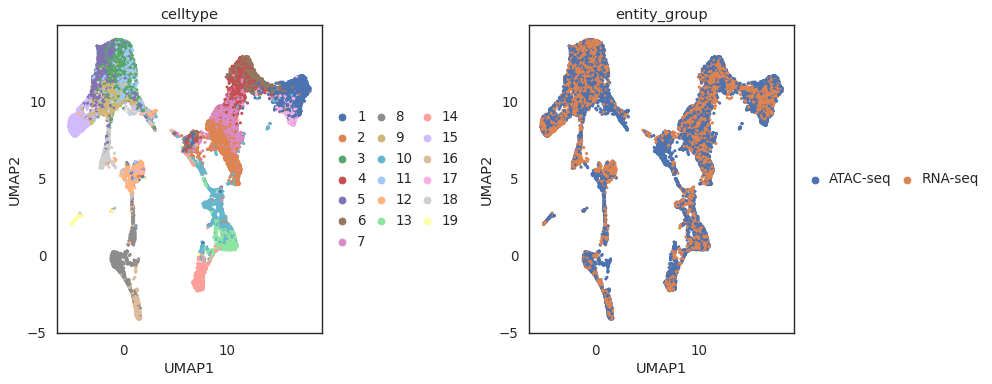

In [80]:
si.pl.umap(adata_all2,color=['celltype','entity_group'],fig_legend_ncol=3,
           dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           fig_size=(6,5))

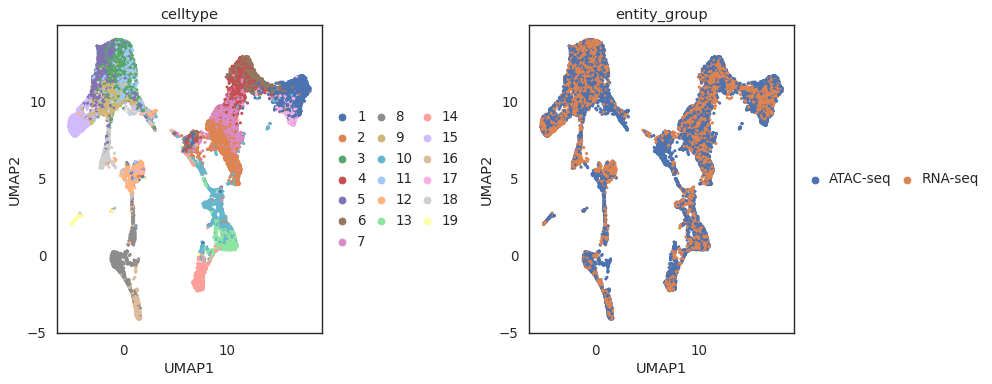

In [81]:
si.pl.umap(adata_all2,color=['celltype','entity_group'],fig_legend_ncol=3,
           dict_palette={'celltype': palette_celltype},
           drawing_order='random',
           fig_size=(6,5))

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


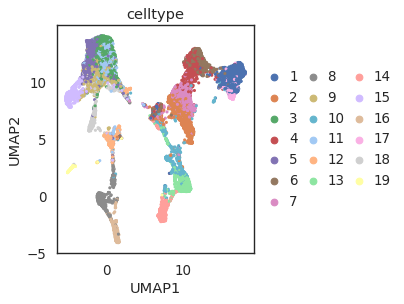

In [82]:
si.pl.umap(adata_all2[adata_C.obs_names,],color=['celltype'],fig_legend_ncol=3,
           drawing_order='random',
           dict_palette={'celltype': palette_celltype},
           fig_size=(5,4))

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


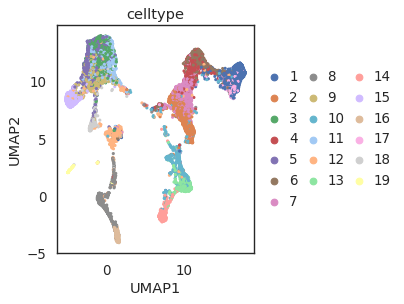

In [83]:
si.pl.umap(adata_all2[adata_C2.obs_names,],color=['celltype'],fig_legend_ncol=3,
           drawing_order='random',
           dict_palette={'celltype': palette_celltype},
           fig_size=(5,4))

In [84]:
adata_CP.write(os.path.join(workdir, 'adata_CP.h5ad'))
adata_CG.write(os.path.join(workdir, 'adata_CG.h5ad'))
adata_CG_atac.write(os.path.join(workdir, 'adata_CG_atac.h5ad'))
adata_CrnaCatac.write(os.path.join(workdir, 'adata_CrnaCatac.h5ad'))
adata_C.write(os.path.join(workdir, 'adata_C.h5ad'))
adata_C2.write(os.path.join(workdir, 'adata_C2.h5ad'))
adata_G.write(os.path.join(workdir, 'adata_G.h5ad'))
adata_P.write(os.path.join(workdir, 'adata_P.h5ad'))
adata_all.write(os.path.join(workdir, 'adata_all.h5ad'))
adata_all2.write(os.path.join(workdir, 'adata_all2.h5ad'))

... storing 'pbg_id' as categorical
... storing 'pbg_id' as categorical
... storing 'chr' as categorical
... storing 'strand' as categorical
... storing 'id_dataset' as categorical
... storing 'entity_group' as categorical
... storing 'id_dataset' as categorical
... storing 'entity_group' as categorical


In [85]:
adata_all.uns['color']

{'celltype_color': {1: '#4c72b0',
  2: '#dd8452',
  3: '#55a868',
  4: '#c44e52',
  5: '#8172b3',
  6: '#937860',
  7: '#da8bc3',
  8: '#8c8c8c',
  9: '#ccb974',
  10: '#64b5cd',
  11: '#a1c9f4',
  12: '#ffb482',
  13: '#8de5a1',
  14: '#ff9f9b',
  15: '#d0bbff',
  16: '#debb9b',
  17: '#fab0e4',
  18: '#cfcfcf',
  19: '#fffea3'},
 'entity_group_color': {'RNA-seq': '#dd8452', 'ATAC-seq': '#4c72b0'}}